In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
control_data = np.genfromtxt('data/control.csv', delimiter=',')
alcohol_gel_data = np.genfromtxt('data/alcohol_gel_larvender.csv', delimiter=',')
alcohol_75_data = np.genfromtxt('data/alcohol_spray_75p.csv', delimiter=',')

In [4]:
col_val = ['O3', 'SO2', 'H2S', 'IAQ', 'CO', 'EtOH', 'RESP', 'NO2']

In [5]:
control = pd.DataFrame(control_data, columns=col_val)
alcohol_gel = pd.DataFrame(alcohol_gel_data, columns=col_val)
alcohol_75 = pd.DataFrame(alcohol_75_data, columns=col_val)

In [6]:
control['target'] = 'control'
alcohol_gel['target'] = 'alcohol_gel'
alcohol_75['target'] = 'alcohol_75'

In [7]:
df = pd.concat([control, alcohol_gel, alcohol_75])

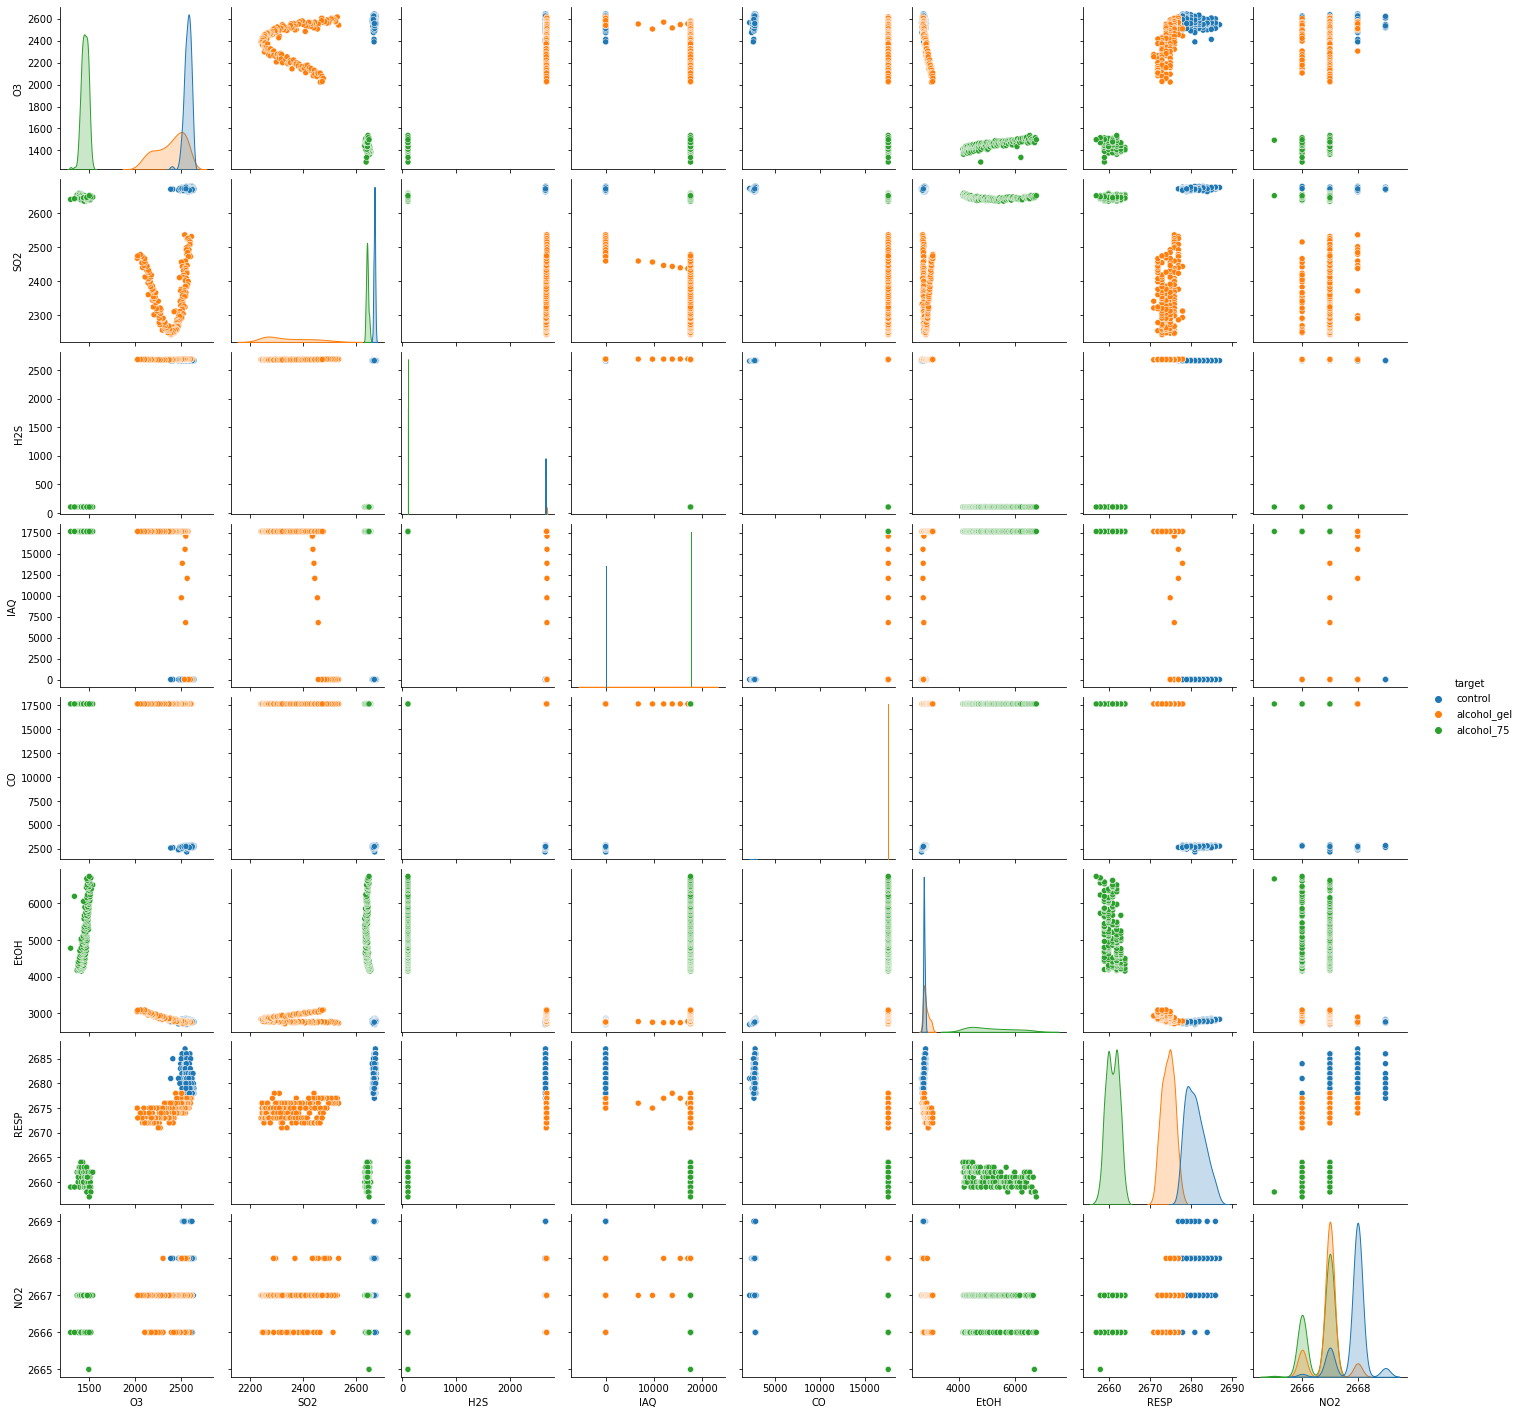

In [8]:
sns.pairplot(df, hue='target')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [11]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
log_mod = LogisticRegression()

In [13]:
log_mod.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = log_mod.predict(X_test)

In [15]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  alcohol_75       1.00      1.00      1.00        63
 alcohol_gel       1.00      1.00      1.00        57
     control       1.00      1.00      1.00        72

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

[[63  0  0]
 [ 0 57  0]
 [ 0  0 72]]
